## Fashion Mnist: example with a Learning Rate (LR) scheduler

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
# check TensorFlow version
print(tf.__version__)

2.4.1


In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
# globals 
EPOCHS = 60
BATCH_SIZE = 256

In [5]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [6]:
print('Number of training images:', train_images.shape[0])
print('Number of test images:', test_images.shape[0])

Number of training images: 60000
Number of test images: 10000


In [7]:
# how many distinct classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# ok 10 distinct classes labeled as 0..9

In [9]:
# images are greyscale images
train_images.shape

(60000, 28, 28)

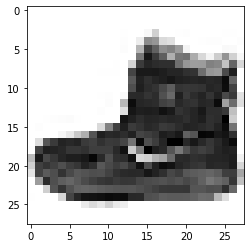

In [10]:
# let's sess one image
plt.imshow(train_images[0], cmap = 'Greys');

In [11]:
# let's build a first classification model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        
        # adding these two intermediate layers I go from 0.85 to 0.87 validation accuracy
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])
    
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
    
    return model

In [12]:
# let's see how many parameters, etc
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
# add a Callback that changes the learning rate during the training
def lr_schedule(epoch):
    lr_initial = 0.001
    ep_start_decay = 20
    decay_rate = 0.9
    
    if epoch > ep_start_decay:
        lr = lr_initial * decay_rate ** (epoch - ep_start_decay)
    else:
        lr = lr_initial
        
    return lr

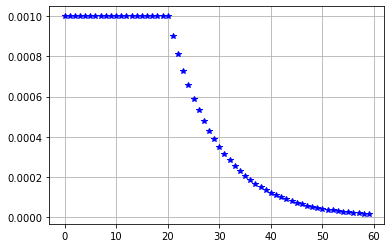

In [14]:
# let's plot it
def plot_ls_scheduler(fn):
    vet_epochs = np.arange(EPOCHS)
    vet_lr = [fn(epoch) for epoch in vet_epochs]
    plt.plot(vet_epochs, vet_lr, 'b*')
    plt.grid()

# here we plot
plot_ls_scheduler(lr_schedule)

In [15]:
# the callback for the LR cheduler
cbk1 = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose = 1)

history = model.fit(train_images, train_labels, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_split = 0.1, callbacks = [cbk1])

Epoch 1/60

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
211/211 [==============================] - 2s 6ms/step - loss: 9.6671 - accuracy: 0.6046 - val_loss: 1.0801 - val_accuracy: 0.7825
Epoch 2/60

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
211/211 [==============================] - 1s 3ms/step - loss: 0.9631 - accuracy: 0.7832 - val_loss: 0.7226 - val_accuracy: 0.7990
Epoch 3/60

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
211/211 [==============================] - 1s 3ms/step - loss: 0.6510 - accuracy: 0.8184 - val_loss: 0.5901 - val_accuracy: 0.8215
Epoch 4/60

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
211/211 [==============================] - 1s 3ms/step - loss: 0.5393 - accuracy: 0.8302 - val_loss: 0.5619 - val_accuracy: 0.8280
Epoch 5/60

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.
211/211 [==============================] - 1s 3ms/step - loss: 0.4678 - accu

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy =  history.history['accuracy']
val_accuracy =  history.history['val_accuracy']

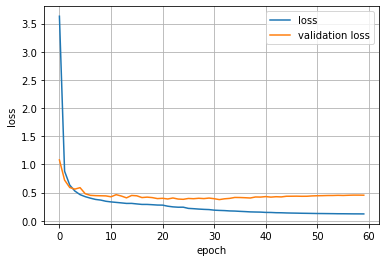

In [17]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

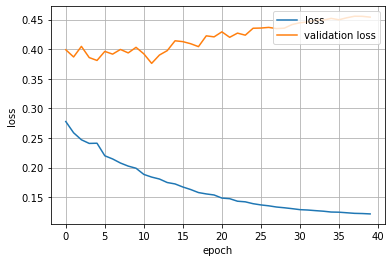

In [18]:
# wants to see if it starts overfitting
START = 20

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(loss[START:], label = 'loss')
plt.plot(val_loss[START:], label = 'validation loss')
plt.legend(loc = 'upper right')
plt.grid();

In [19]:
# ok it has slightly started overfitting.. as we can see from epochs 15 validation loss becomes higher and training loss is still decreasing

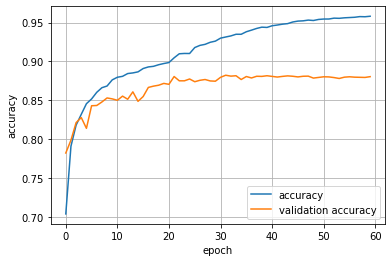

In [20]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.grid();

In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 925us/step - loss: 0.4801 - accuracy: 0.8766


[0.4801119267940521, 0.8766000270843506]